In [1]:
# with Missing data
data2 <- read.csv("C:\\Users\\pavan\\Downloads\\cerealspga05.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

str(data2)

'data.frame':	74 obs. of  16 variables:
 $ name    : chr  "100%_Bran" "All-Bran" "All-Bran_with_Extra_Fiber" "Cracklin'_Oat_Bran" ...
 $ mfr     : chr  "N" "K" "K" "K" ...
 $ type    : chr  "C" "C" "C" "C" ...
 $ calories: int  70 70 50 110 120 120 120 110 110 110 ...
 $ protein : int  4 4 4 3 3 3 3 2 2 2 ...
 $ fat     : int  1 1 0 3 1 1 5 2 2 0 ...
 $ sodium  : int  130 260 140 140 200 210 15 200 180 125 ...
 $ fiber   : num  10 9 14 4 6 5 2 1 1.5 1 ...
 $ carbo   : num  5 7 8 10 11 14 8 14 10.5 11 ...
 $ sugars  : int  6 5 0 7 14 12 8 8 10 14 ...
 $ potass  : int  280 320 330 160 260 240 135 -1 70 30 ...
 $ vitamins: int  25 25 25 25 25 25 0 25 25 25 ...
 $ shelf   : int  3 3 3 3 3 2 3 3 1 2 ...
 $ weight  : num  1 1 1 1 1.33 1.33 1 1 1 1 ...
 $ cups    : num  0.33 0.33 0.5 0.5 0.67 0.75 1 0.75 0.75 1 ...
 $ rating  : num  68.4 59.4 93.7 40.4 37.8 ...


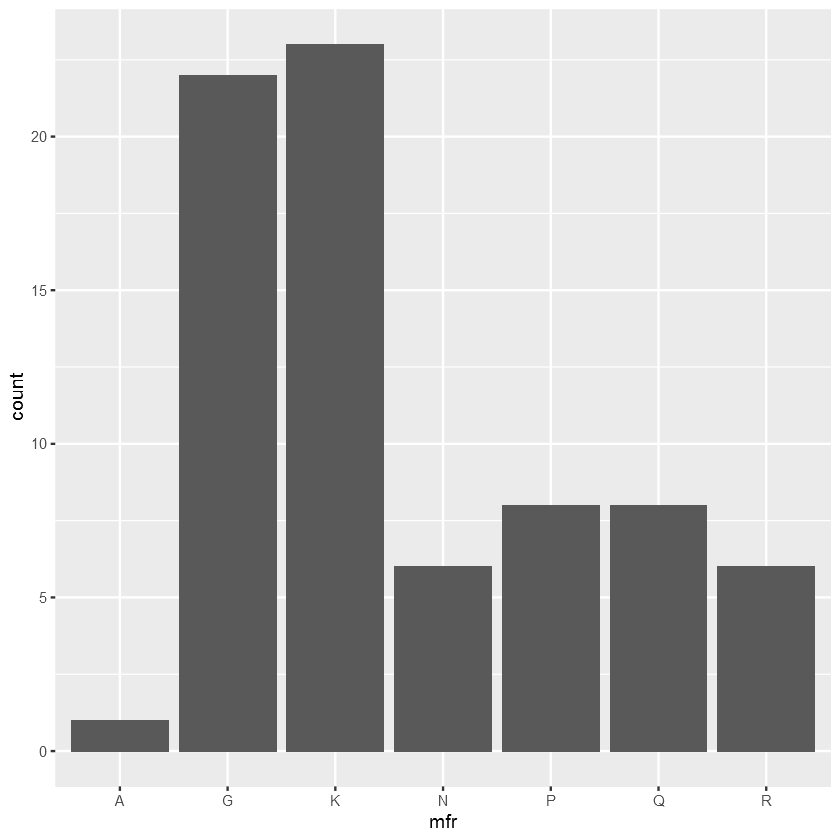

In [2]:
library(ggplot2)
ggplot(data2) +
  geom_bar( aes(mfr) )

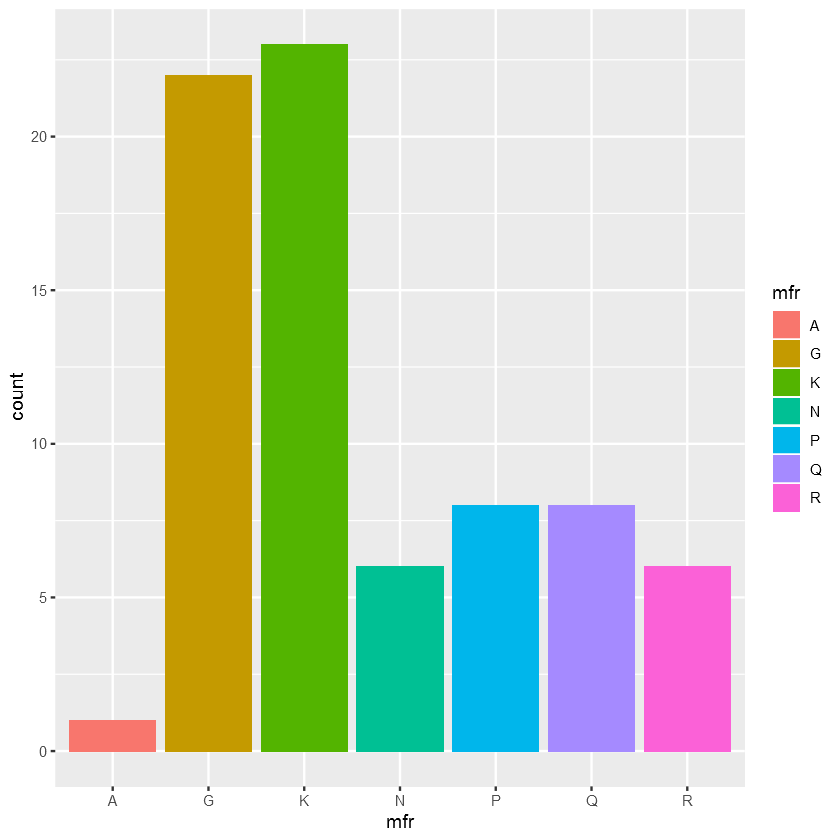

In [3]:
ggplot(data2, aes(mfr, fill = mfr) ) +
  geom_bar()

In [4]:
t(tapply(data2$sodium, data2$mfr, mean))

A,G,K,N,P,Q,R
0,200.4545,174.7826,37.5,144.375,92.5,223.3333


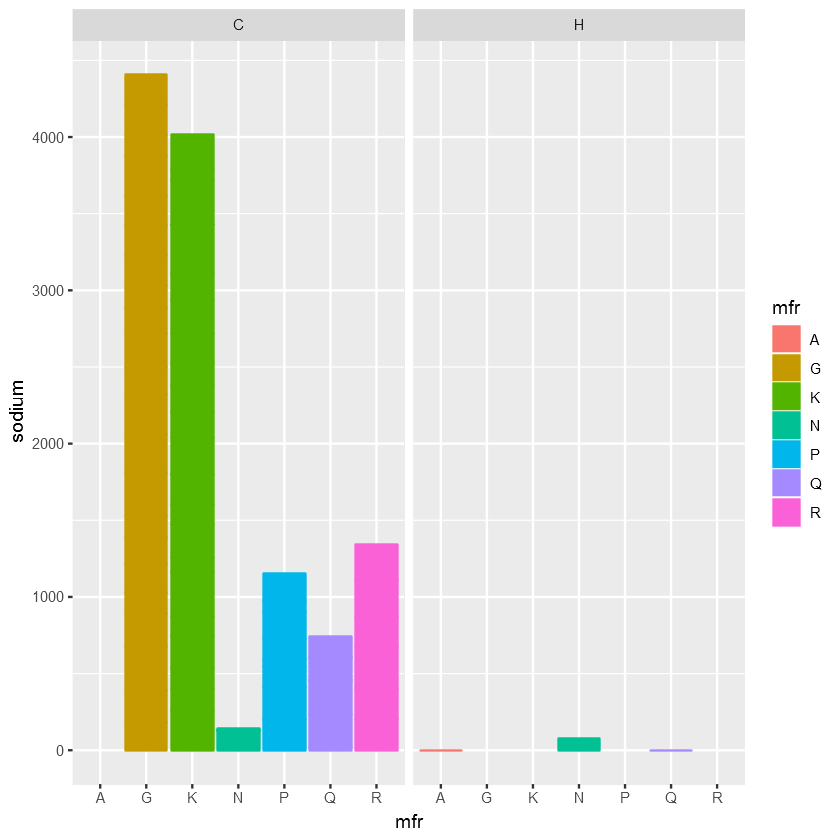

In [5]:
# Faceting
ggplot(data2, aes(y=sodium, x=mfr, color=mfr, fill=mfr)) + 
    geom_bar( stat="identity") +    
    facet_wrap(~type)

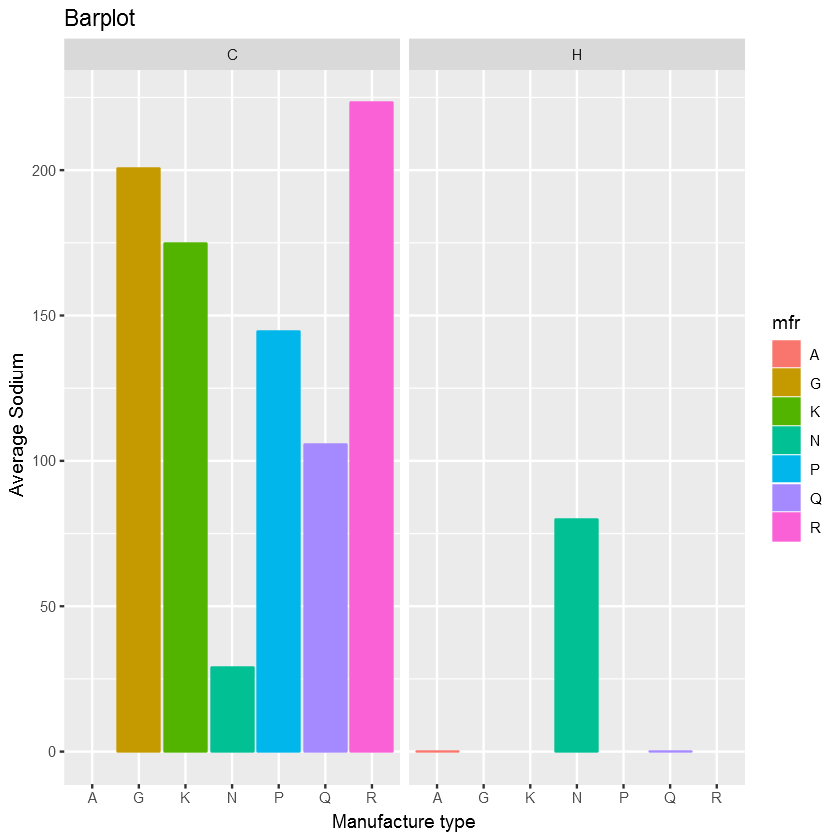

In [6]:
ggplot(data2, aes(y=sodium, x=mfr, color=mfr, fill=mfr)) + 
    geom_bar( stat = "summary", fun.y = "mean") +    
    facet_wrap(~type) +
labs(title="Barplot", 
         x="Manufacture type", y = "Average Sodium")

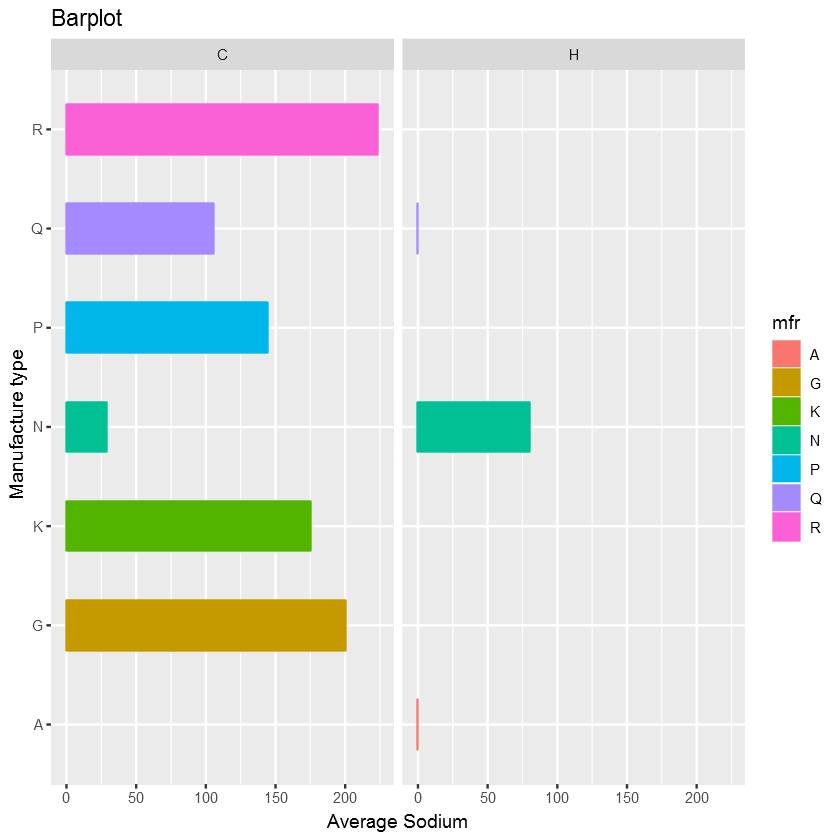

In [7]:
ggplot(data2, aes(y=sodium, x=mfr, color=mfr, fill=mfr)) + 
    geom_bar( stat = "summary", fun.y = "mean", width=0.5) +    
    facet_wrap(~type)+
coord_flip() +
labs(title="Barplot", 
         x="Manufacture type", y = "Average Sodium")

theme_gray()
theme_bw()
theme_linedraw()
theme_light()
theme_minimal()
theme_classic()
theme_void()

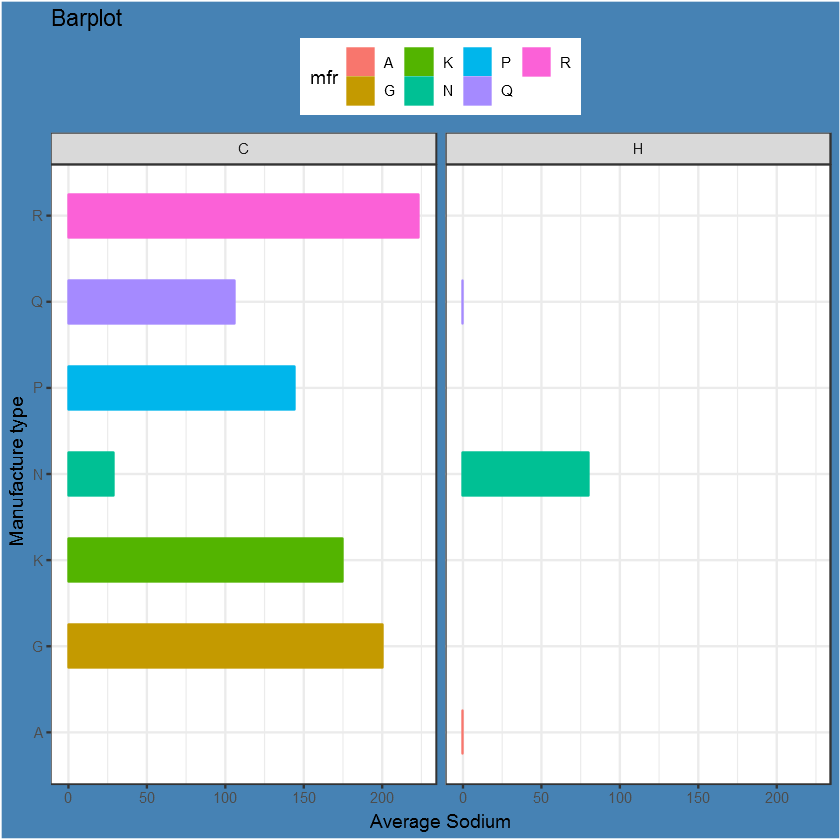

In [8]:
ggplot(data2, aes(y=sodium, x=mfr, color=mfr, fill=mfr)) + 
    geom_bar( stat = "summary", fun.y = "mean", width=0.5) +    
    facet_wrap(~type)+
coord_flip() +
labs(title="Barplot", 
         x="Manufacture type", y = "Average Sodium")+
theme_bw()+theme(legend.position="top" , plot.background=element_rect(fill="steelblue"))

In [9]:
# ggsave("myggplot.png")  # saves the last plot.
# ggsave("myggplot.png", plot=plot1)  # save a stored ggplot

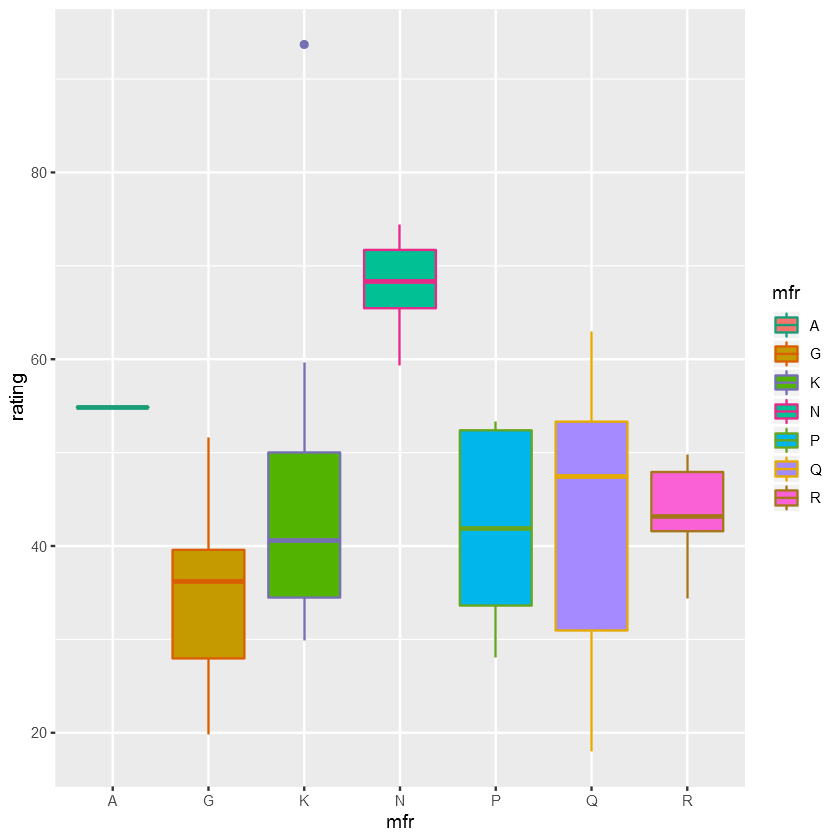

In [10]:
# Basic box plot
# notch=TRUE
ggplot(data2, aes(x=mfr, y=rating, col=mfr , fill=mfr)) + 
  geom_boxplot() + scale_color_brewer(palette="Dark2")

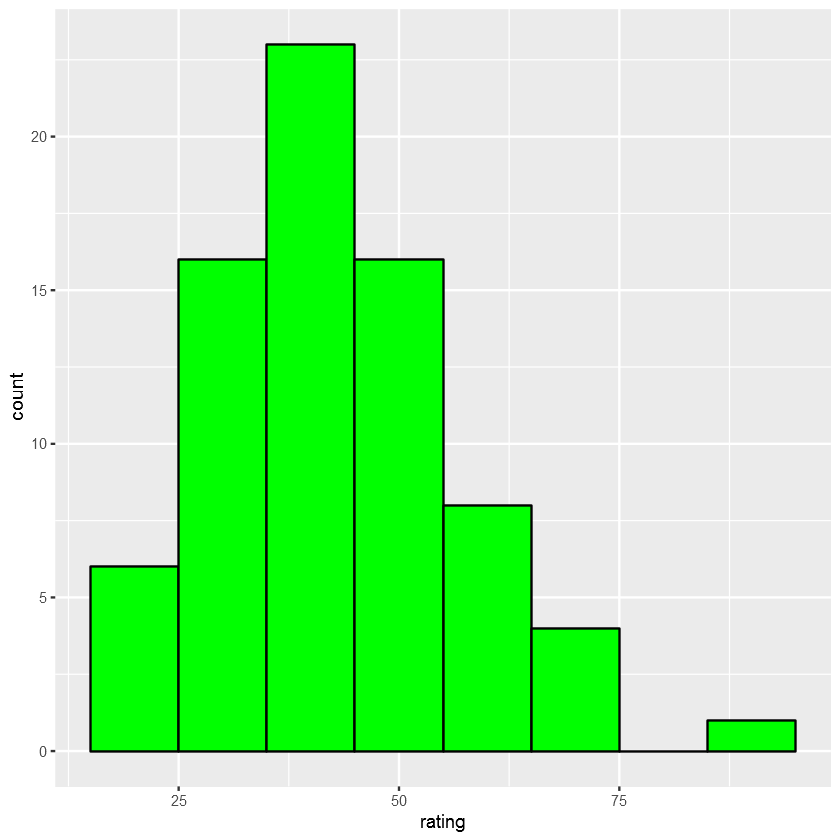

In [11]:
p<-ggplot(data2, aes(x=rating)) + 
  geom_histogram(color="black", fill="green" , binwidth=10)
p

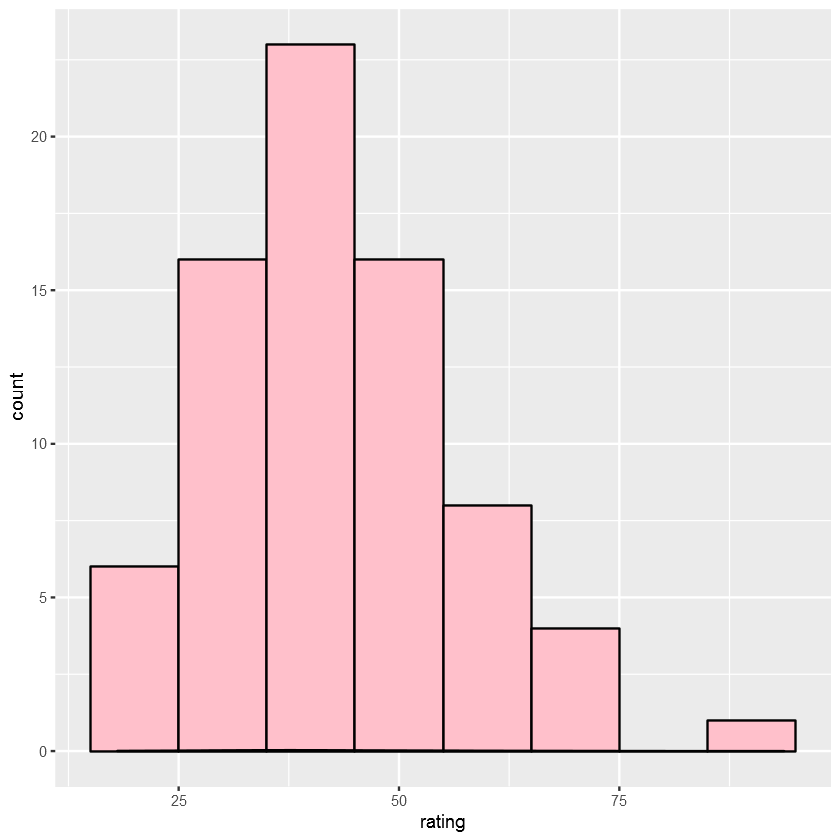

In [12]:
p<-ggplot(data2, aes(x=rating)) + 
  geom_histogram(color="black", fill="pink" , binwidth=10) + geom_density(alpha=.8, fill="green") 
p

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


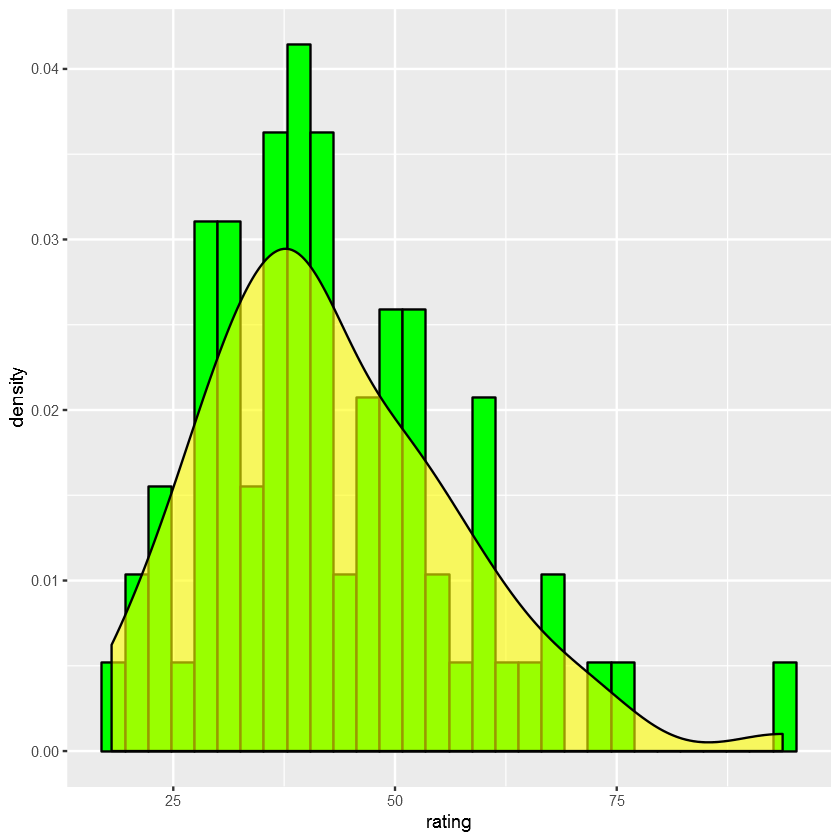

In [13]:
# Histogram with density plot
ggplot(data2, aes(x=rating)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="green")+
 geom_density(alpha=.6, fill="yellow") 

###### 

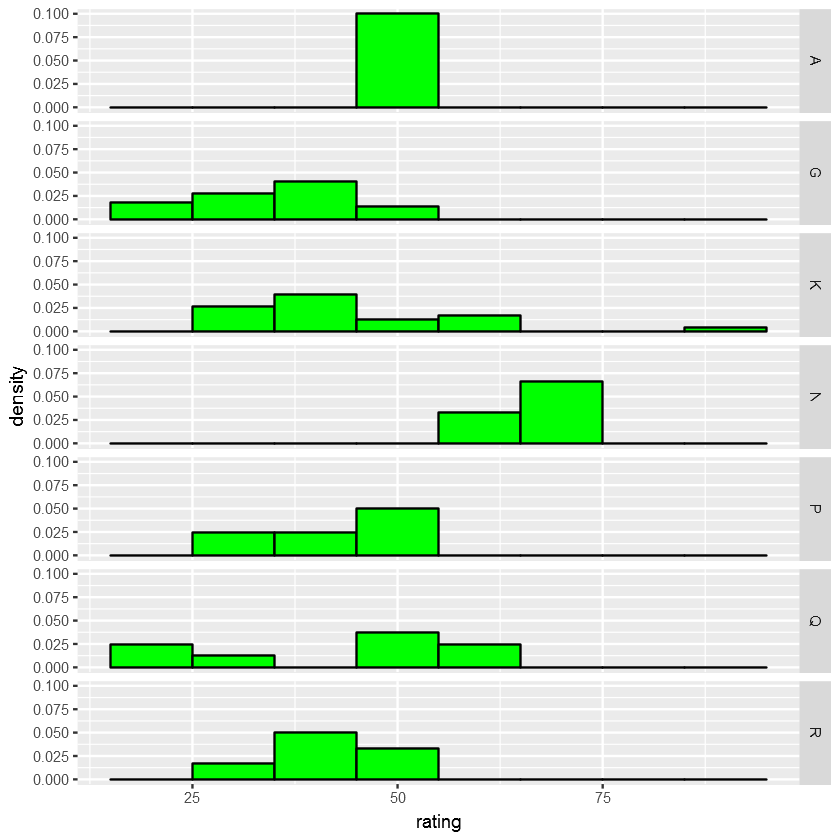

In [14]:
# Histogram with density plot
ggplot(data2, aes(x=rating)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="green", binwidth=10)+
 
 facet_grid(mfr ~ .)


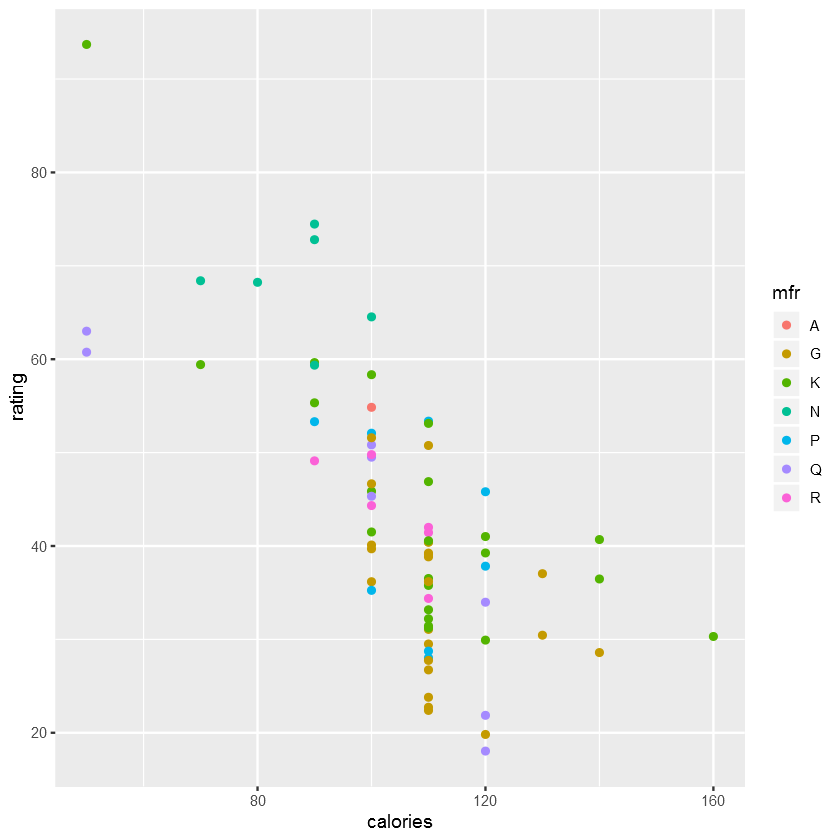

In [15]:
# Scatter Plot
ggplot(data2,
       aes(y = rating, x = calories, col=mfr)) +
  geom_point( )

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 110"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 10"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  0"Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"pseudoinverse used at 110"Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"neighborhood radius 10"Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"reciprocal condition number  0"

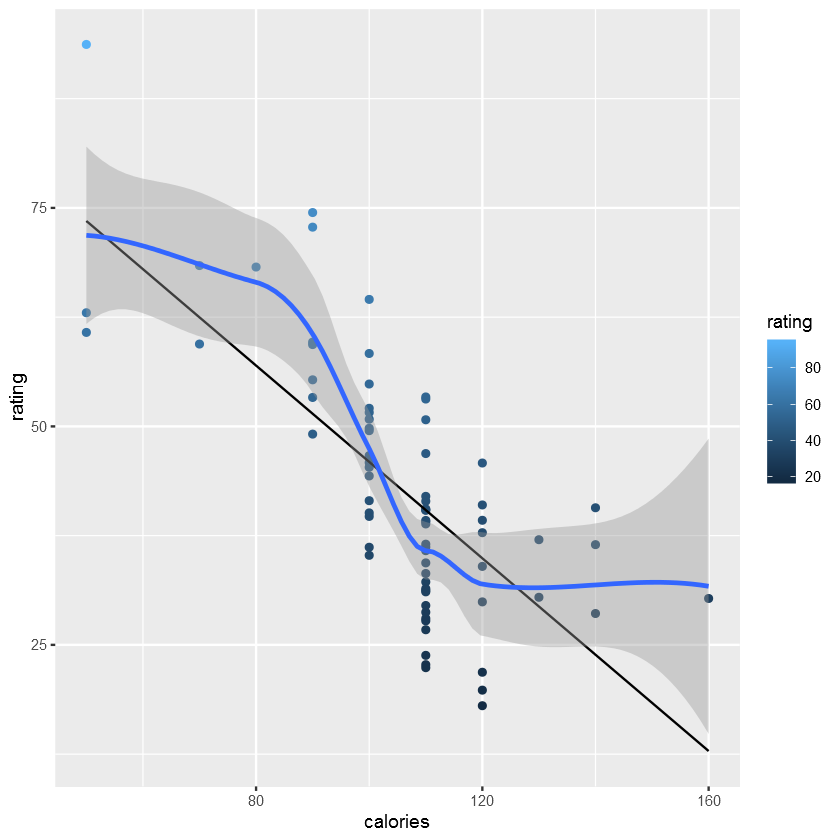

In [16]:
data2$pred.SC <- predict(lm(rating ~ calories, data = data2))

p1 <- ggplot(data2, aes(x = calories, y = rating))

p1 + geom_point(aes(color = rating)) +
  geom_line(aes(y = pred.SC)) +
geom_smooth(method = 'loess' )

# geometric objects are simple shapes–the smooth geom includes a line and a ribbon.